# 분석 현황

- 하루간 평균 MET
- 하루간 활동 칼로리
- 하루간 총 사용 칼로리
- 매일 움직인 거리(m)
- 활동 종료 시간
- 활동 시작 시간
- 고강도 활동 시간
- 비활동 시간
- 비활동 알람 횟수
- 저강도 활동 시간
- 중강도 활동 시간
- 하루간 고강도 활동 MET
- 하루간 비활동 MET
- 하루간 저강도 활동 MET
- 하루간 중강도 활동 MET
- 반지 미착용 시간
- 휴식 시간
- 활동 점수
- 활동 목표달성 점수
- 매 시간 당 활동유지 점수
- 회복시간 점수
- 활동 유지 점수
- 운동 빈도 점수
- 운동량 점수
- 매일 걸음 수
- 활동 총 시간(분)
- 하루간 5분당 활동 로그 (UTF-8) -> 분석 완료
- 하루간 1분당 MET 로그 (UTF-8) -> 분석 완료

# Numerical Data에 대한 EDA

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import rc
from warnings import filterwarnings
import matplotlib.pyplot as plt
rc('font', family='Malgun Gothic')
filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)
walk_target = pd.read_csv('LifeLog\Data\\1.Training\라벨링데이터\\1.걸음걸이\\training_label.csv').rename(columns={'SAMPLE_EMAIL':"EMAIL"})
walk_lifelog = pd.read_csv('LifeLog\Data\\1.Training\원천데이터\\1.걸음걸이\\train_activity.csv')
walk_df = walk_lifelog.merge(walk_target,on='EMAIL')
walk_df.rename(columns={
    'activity_average_met': '하루간 평균 MET',
    'activity_cal_active': '하루간 활동 칼로리',
    'activity_cal_total': '하루간 총 사용 칼로리',
    'activity_class_5min': '하루간 5분당 활동 로그',
    'activity_daily_movement': '매일 움직인 거리(m)',
    'activity_day_end': '활동 종료 시간',
    'activity_day_start': '활동 시작 시간',
    'activity_high': '고강도 활동 시간',
    'activity_inactive': '비활동 시간',
    'activity_inactivity_alerts': '비활동 알람 횟수',
    'active_low': '저강도 활동 시간',
    'activity_medium': '중강도 활동 시간',
    'activity_met_1min': '하루간 1분 당 MET 로그',
    'activity_met_min_high': '하루간 고강도 활동 MET',
    'activity_met_min_inactive': '하루간 비활동 MET',
    'activity_met_min_low': '하루간 저강도 활동 MET',
    'activity_met_min_medium': '하루간 중강도 활동 MET',
    'activity_non_wear': '반지 미착용 시간',
    'activity_rest': '휴식 시간',
    'activity_score': '활동 점수',
    'activity_low':'저강도 활동 시간',
    'activity_score_meet_daily_targets': '활동 목표달성 점수',
    'activity_score_move_every_hour': '매 시간 당 활동유지 점수',
    'activity_score_recovery_time': '회복시간 점수',
    'activity_score_stay_active': '활동 유지 점수',
    'activity_score_training_frequency': '운동 빈도 점수',
    'activity_score_training_volume': '운동량 점수',
    'activity_steps': '매일 걸음 수',
    'activity_total': '활동 총 시간(분)',
    'CONVERT(activity_class_5min USING utf8)': '하루간 5분당 활동 로그 (UTF-8)',
    'CONVERT(activity_met_1min USING utf8)': '하루간 1분당 MET 로그 (UTF-8)',
    'EMAIL': '이메일',
    'DIAG_NM': '진단명'
}, inplace=True)
walk_df.drop(columns=['하루간 5분당 활동 로그','하루간 1분 당 MET 로그','활동 종료 시간','활동 종료 시간','반지 미착용 시간','하루간 5분당 활동 로그 (UTF-8)','하루간 1분당 MET 로그 (UTF-8)'],inplace=True)
df = pd.DataFrame()
df['활동 시작 날짜'] = walk_df['활동 시작 시간'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
walk_df = pd.concat([df,walk_df],axis=1)
walk_df.drop(columns=['활동 시작 시간'],inplace=True)
walk_df

<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
C:\Users\human-02\AppData\Local\Temp\ipykernel_11560\410596875.py:9: SyntaxWarning: invalid escape sequence '\D'
  walk_target = pd.read_csv('LifeLog\Data\\1.Training\라벨링데이터\\1.걸음걸이\\training_label.csv').rename(columns={'SAMPLE_EMAIL':"EMAIL"})
C:\Users\human-02\AppData\Local\Temp\ipykernel_11560\410596875.py:10: SyntaxWarning: invalid escape sequence '\D'
  walk_lifelog = pd.read_csv('LifeLog\Data\\1.Training\원천데이터\\1.걸음걸이\\train_activity.csv')


활동 시작 날짜               이메일  하루간 평균 MET  하루간 활동 칼로리  하루간 총 사용 칼로리  \
0     2020-10-19  nia+279@rowan.kr     1.28125         196          2251   
1     2020-10-20  nia+279@rowan.kr     1.25000         145          2159   
2     2020-10-21  nia+279@rowan.kr     1.21875         118          2140   
3     2020-10-22  nia+279@rowan.kr     1.28125         180          2240   
4     2020-10-23  nia+279@rowan.kr     1.46875         374          2559   
...          ...               ...         ...         ...           ...   
9700  2020-12-24  nia+206@rowan.kr     1.34375         249          2351   
9701  2020-12-26  nia+206@rowan.kr     1.53125         570          2682   
9702  2020-12-27  nia+206@rowan.kr     1.34375         295          2331   
9703  2020-12-28  nia+206@rowan.kr     1.31250         186          2280   
9704  2020-12-29  nia+206@rowan.kr     1.37500          83          1891   

      매일 움직인 거리(m)  고강도 활동 시간  비활동 시간  비활동 알람 횟수  저강도 활동 시간  중강도 활동 시간  \
0             3353          0     714          0        201          6   
1             2516          0     719          0        131          9   
2             1716          0     708          1        125          6   
3             2791          0     705          0        203          5   
4             5393          0     437          0        511          6   
...            ...        ...     ...        ...        ...        ...   
9700          4411          1     780          4        167         22   
9701         11057          1     518          1        332         61   
9702          5135          4     578          0        173         30   
9703          3178          0     778          1        138         18   
9704          1554          0      69          0         61          7   

      하루간 고강도 활동 MET  하루간 비활동 MET  하루간 저강도 활동 MET  하루간 중강도 활동 MET  휴식 시간  \
0                  0            8             133              20    519   
1                  0            9              82              28    464   
2                  0           12              66              19    601   
3                  0           10             122              15    442   
4                  0           18             268              21    453   
...              ...          ...             ...             ...    ...   
9700               7           10             106              82    470   
9701               7            7             257             198    528   
9702              28            8              99             107    655   
9703               0           11              86              56    393   
9704               0            0              41              27    134   

      활동 점수  활동 목표달성 점수  매 시간 당 활동유지 점수  회복시간 점수  활동 유지 점수  운동 빈도 점수  운동량 점수  \
0        87          78             100      100        54       100      97   
1        83          60             100      100        58        96      96   
2        73          43              95      100        55        71      83   
3        70          43             100      100        58        71      59   
4        70          43             100      100        89        40      46   
...     ...         ...             ...      ...       ...       ...     ...   
9700     61          25              43      100        45        40      95   
9701     78          43              95      100        76        71      93   
9702     70          25             100      100        70        40      95   
9703     66          25              95      100        47        40      93   
9704     65          25             100      100        48        40      82   

      매일 걸음 수  활동 총 시간(분)  진단명  
0        4212         207  MCI  
1        3306         140  MCI  
2        2550         131  MCI  
3        4009         208  MCI  
4        8081         517  MCI  
...       ...         ...  ...  
9700     4972         190   CN  
9701    11878         394   CN  
9702     5752         207   CN  
97

# 비교 대상군(CN MCI Dem) 별 각 칼럼의 시계열 데이터 그래프 

## 비교 대상군별 (CN | MCI | Dem)의 각 칼럼의 평균을 구해서 Time Series Visualization

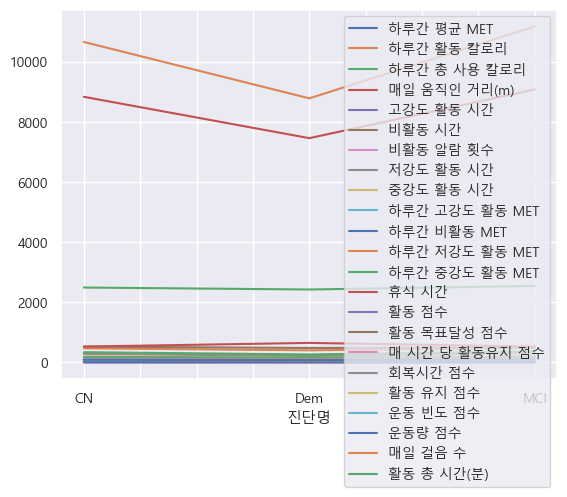

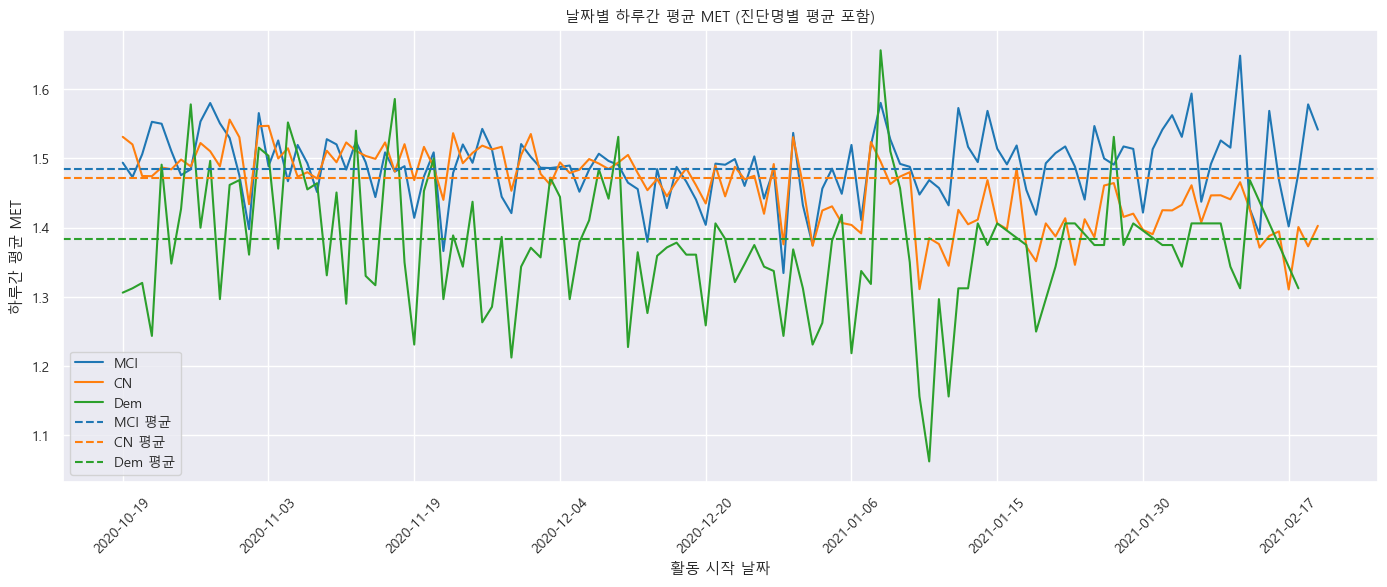

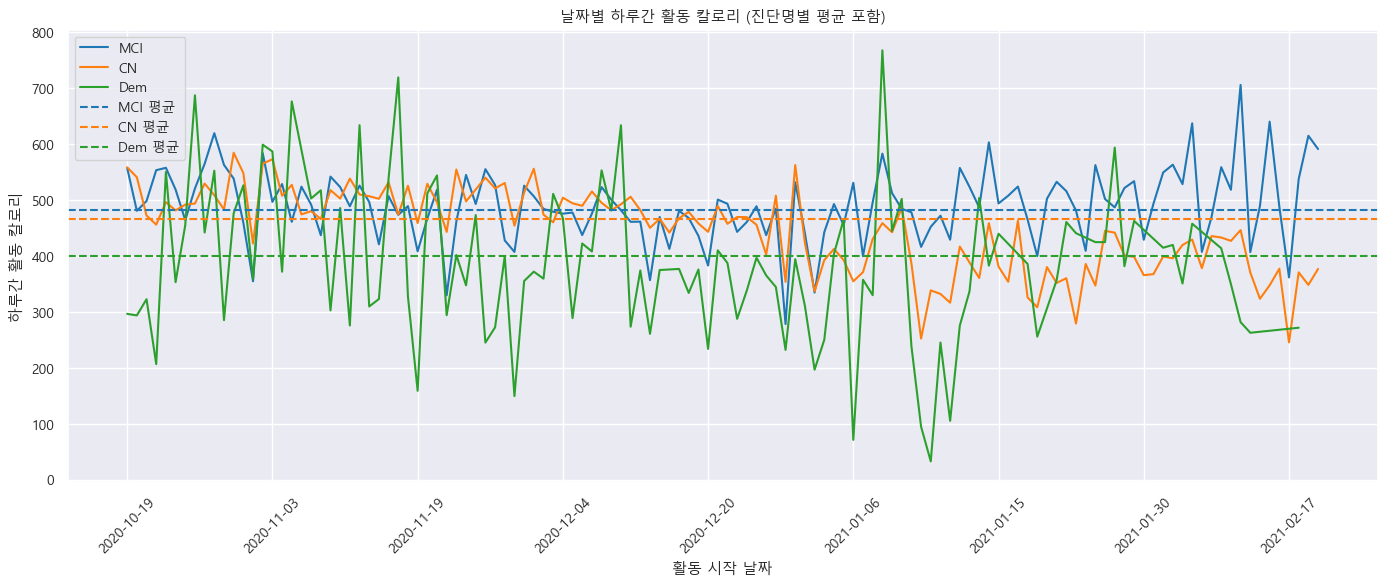

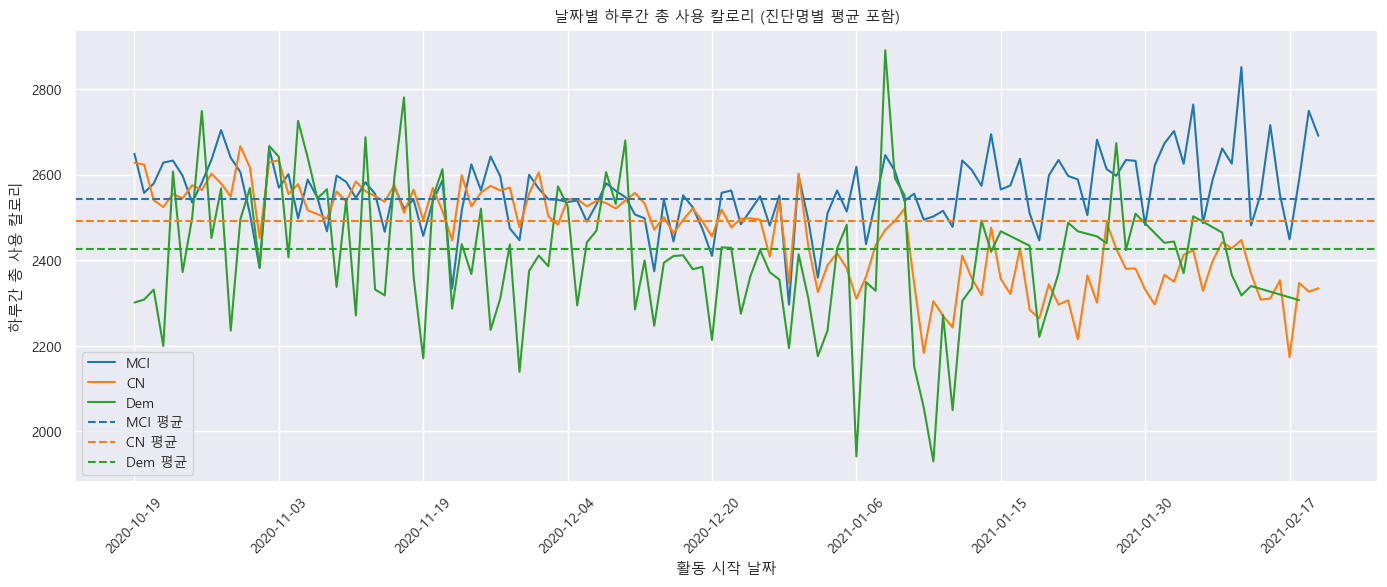

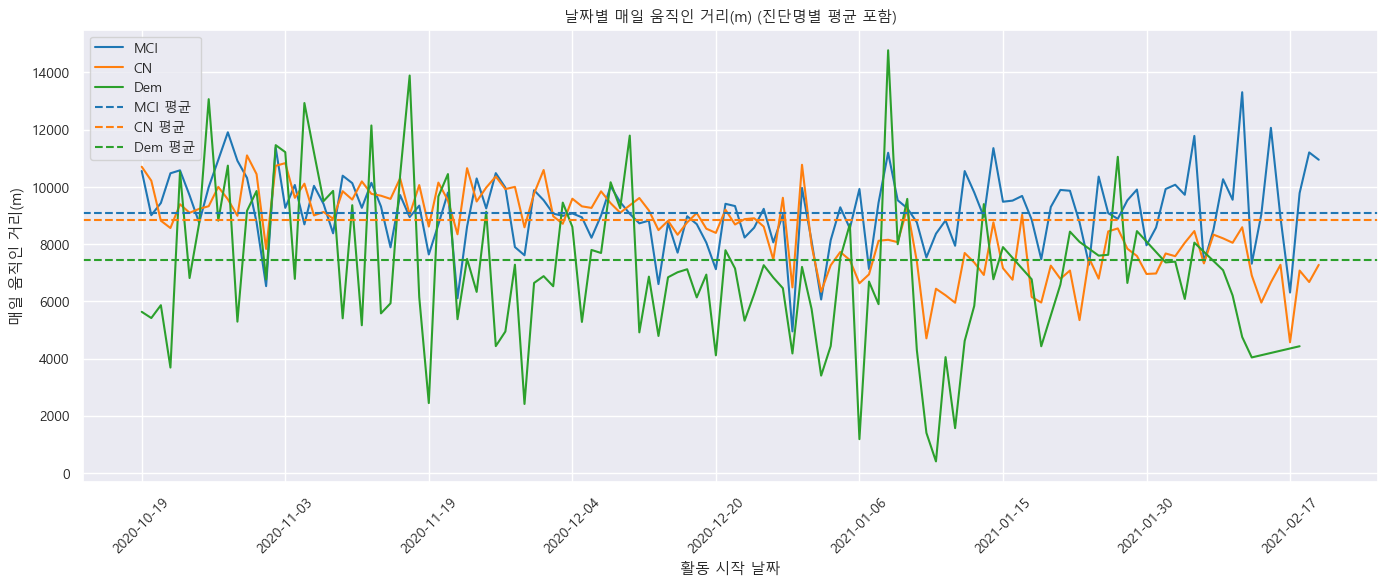

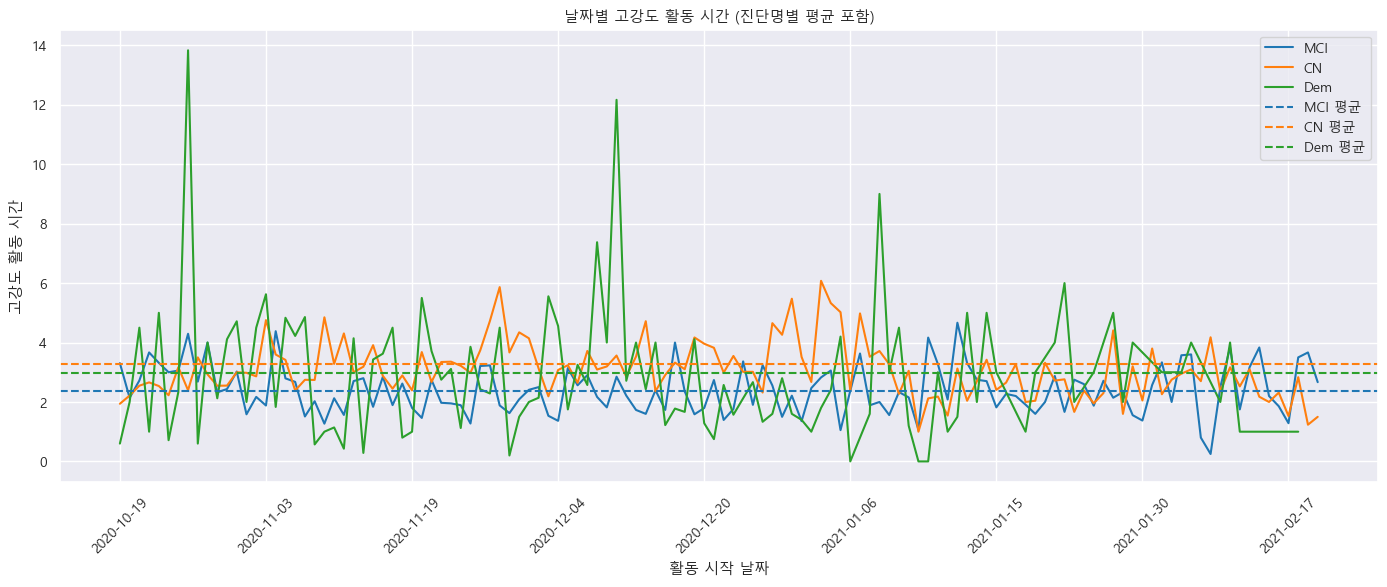

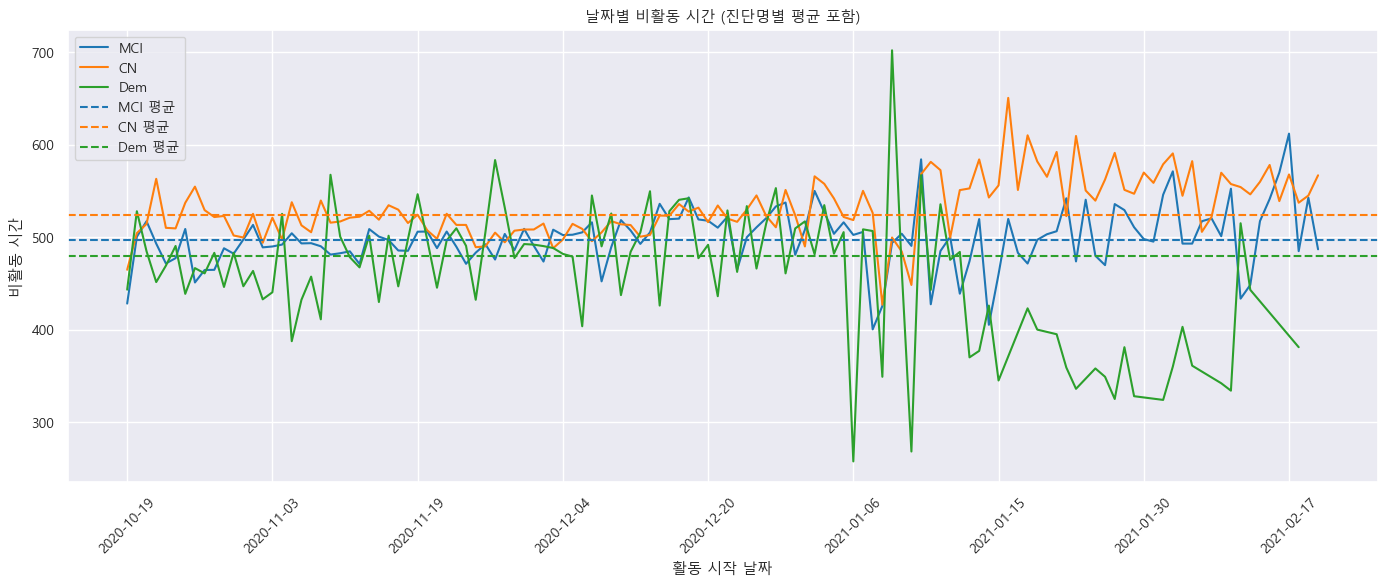

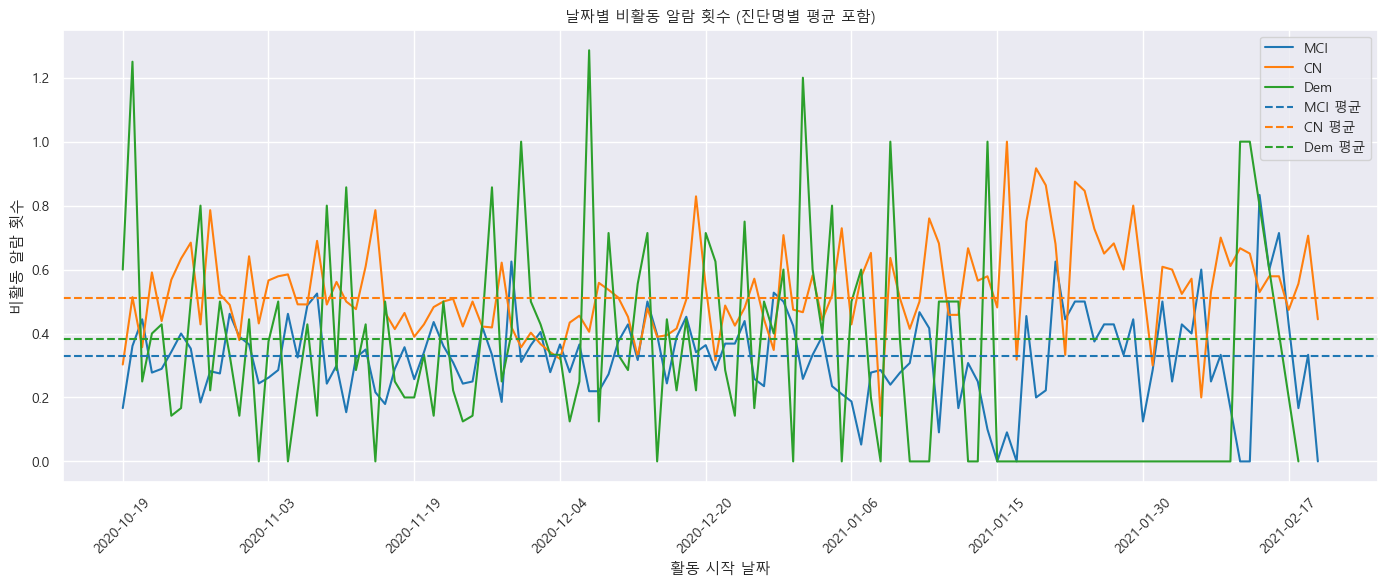

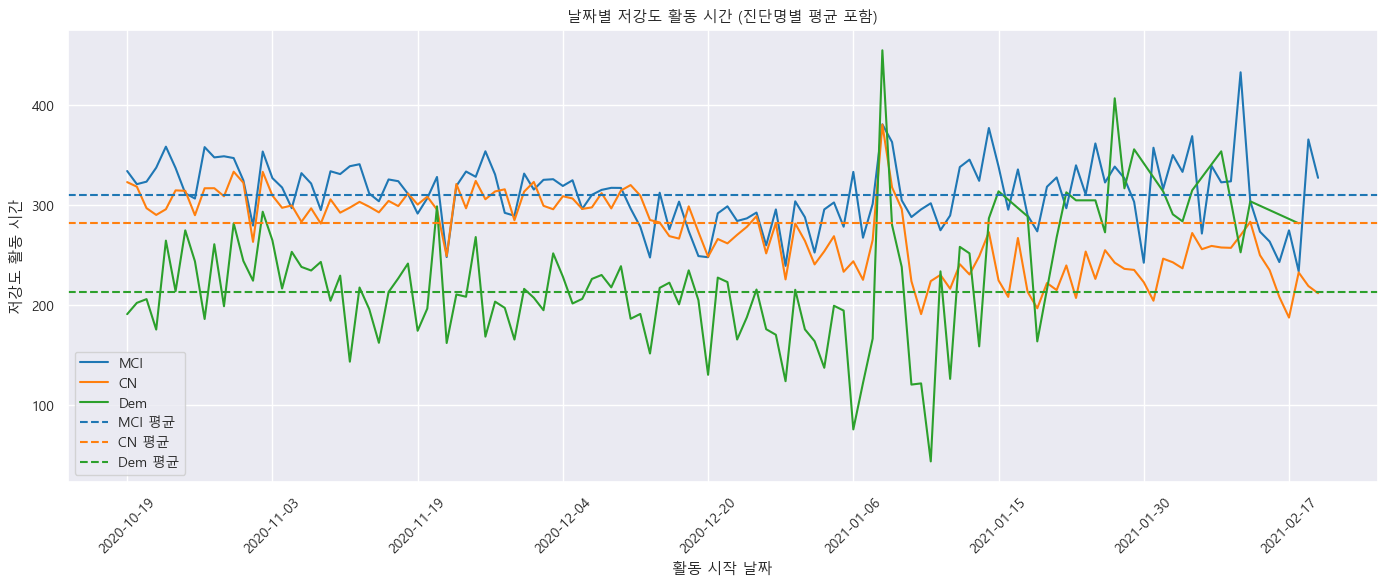

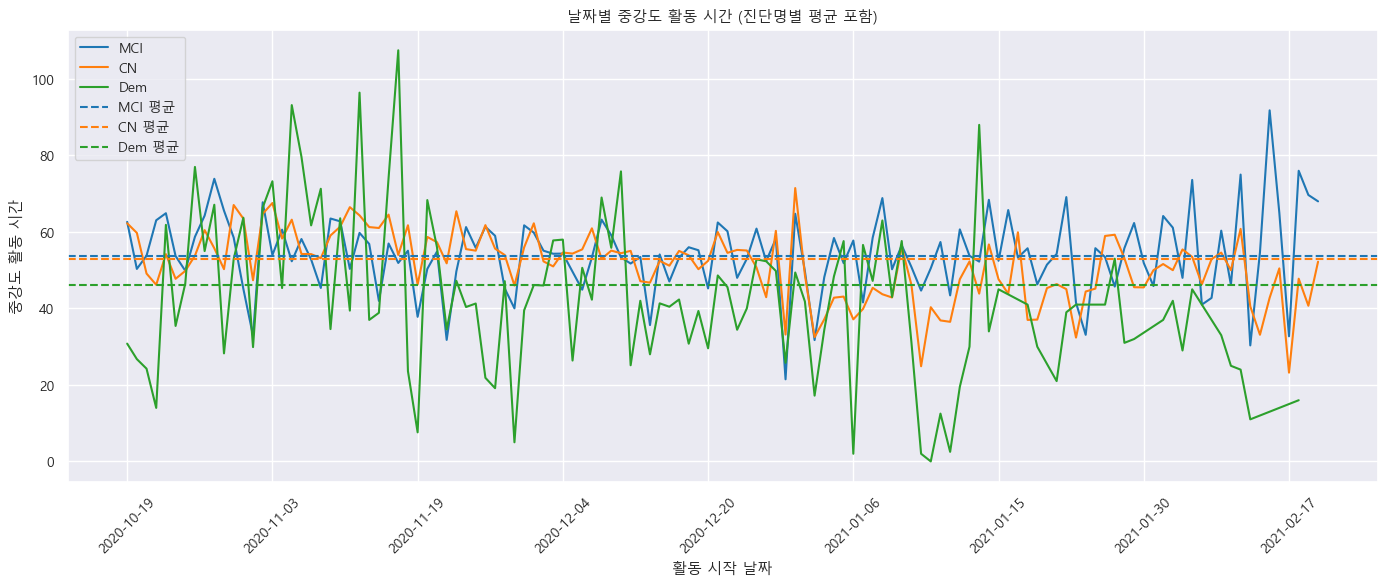

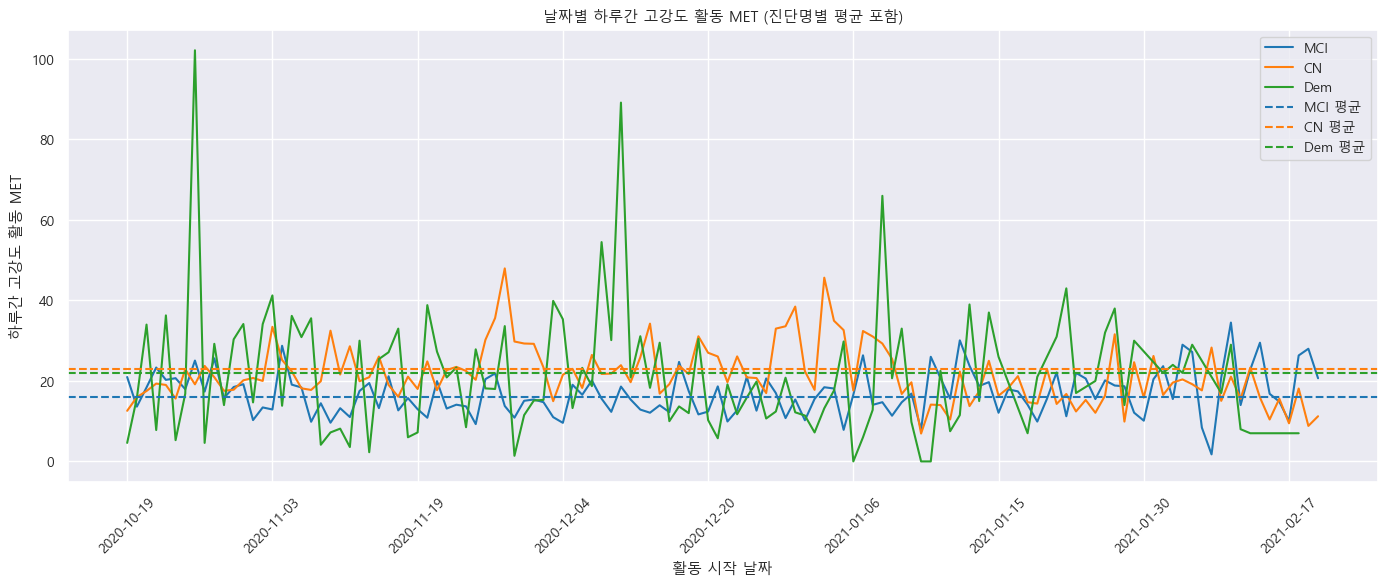

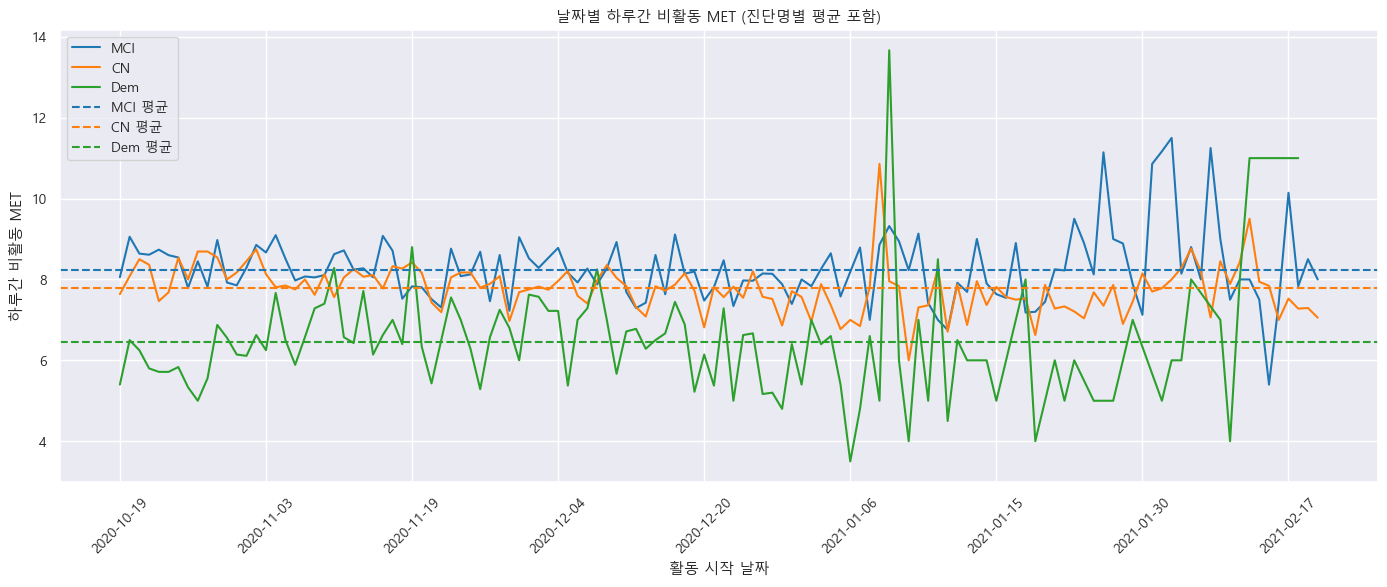

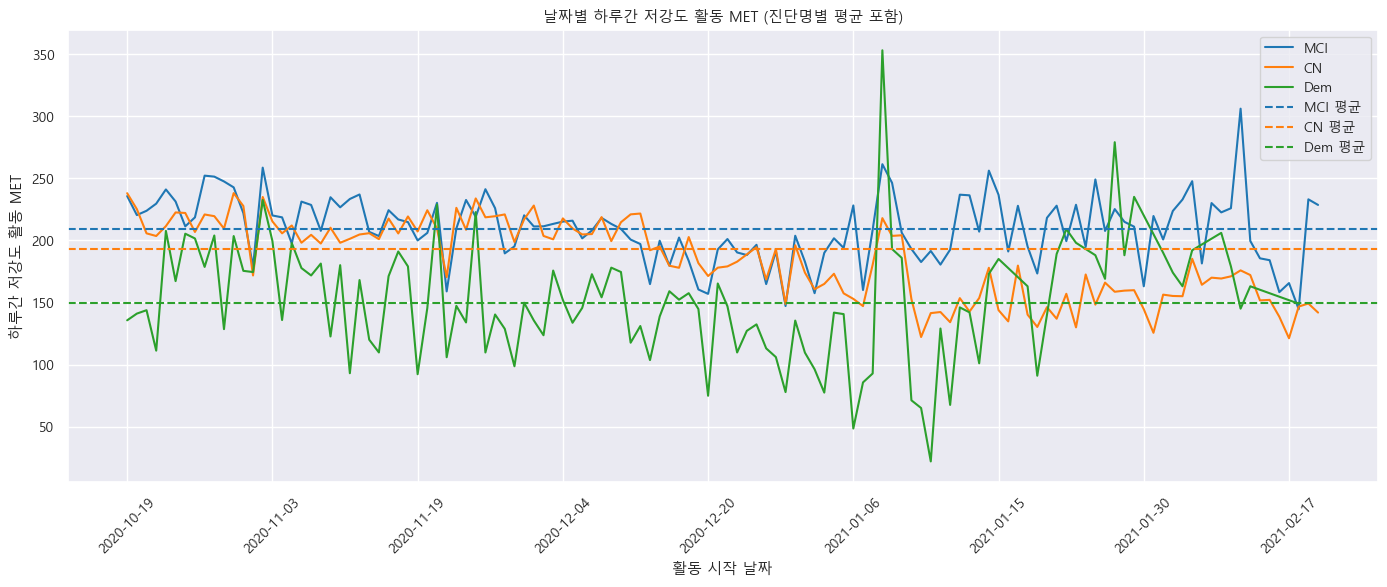

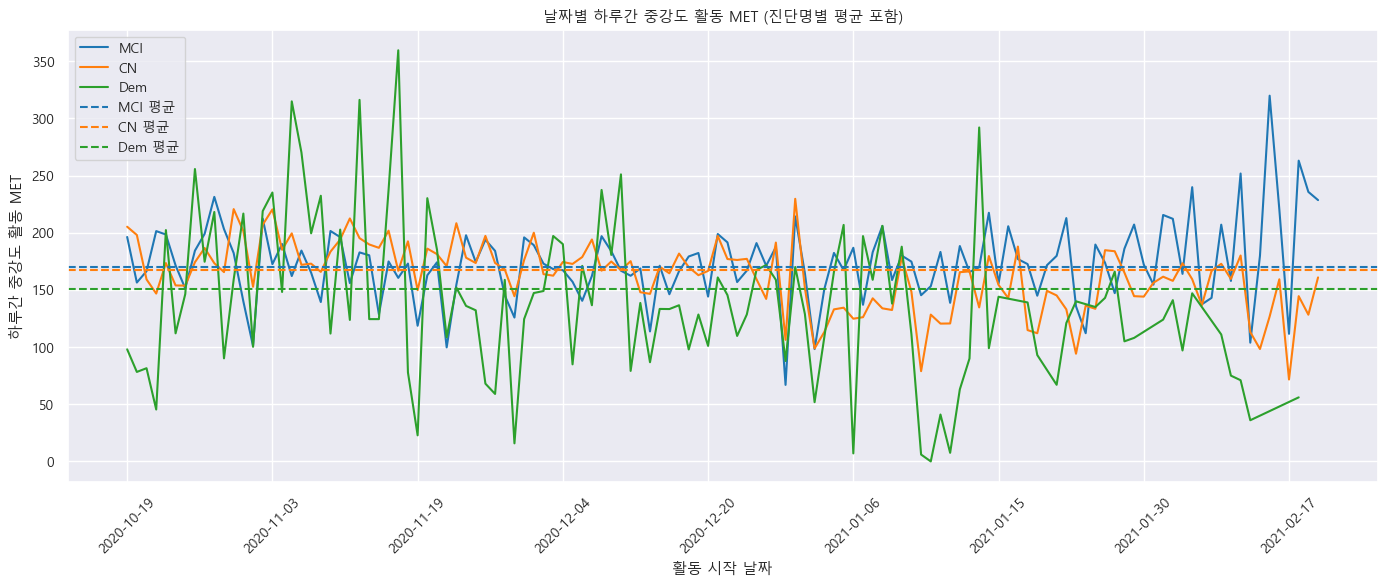

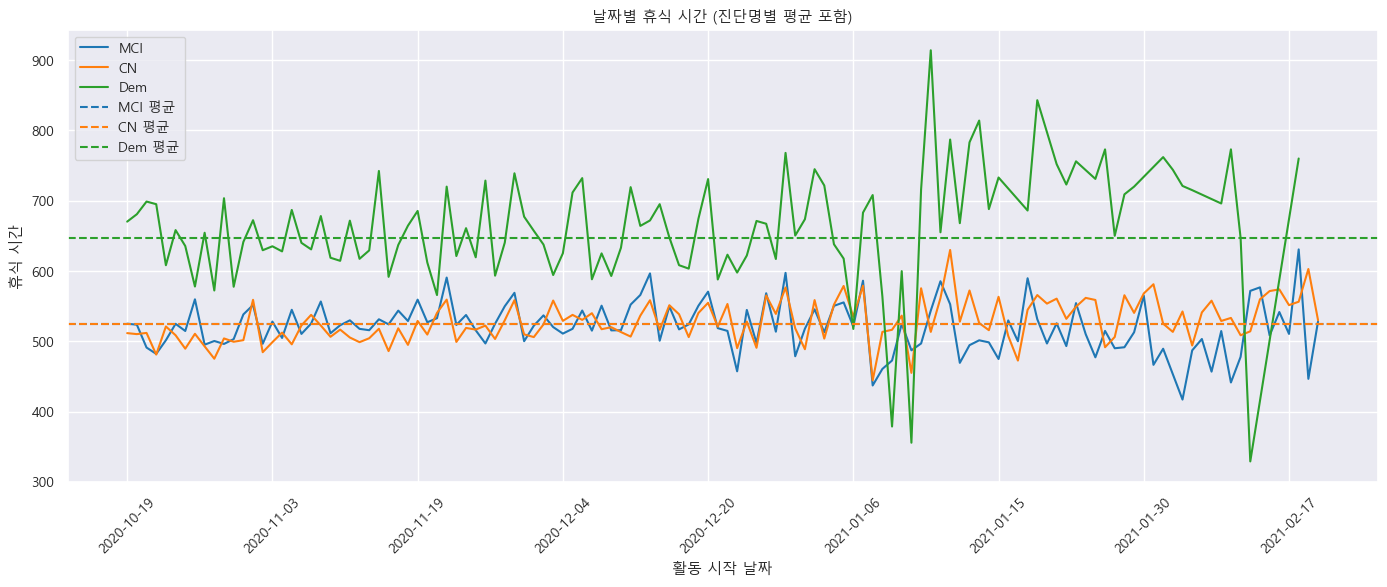

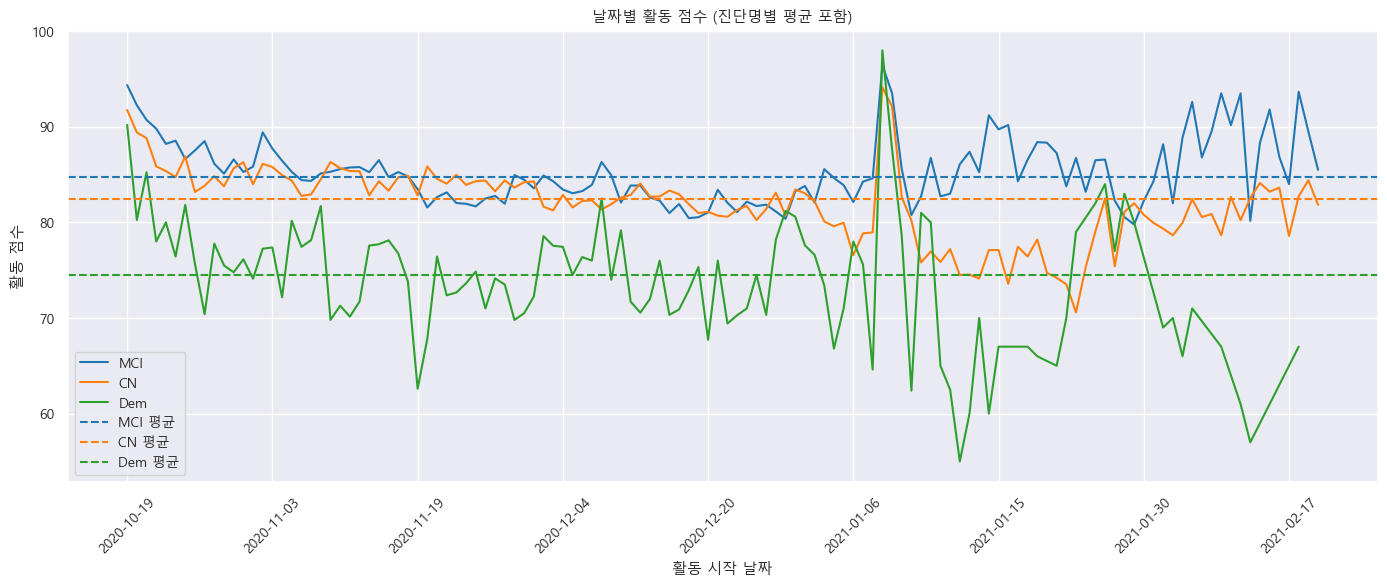

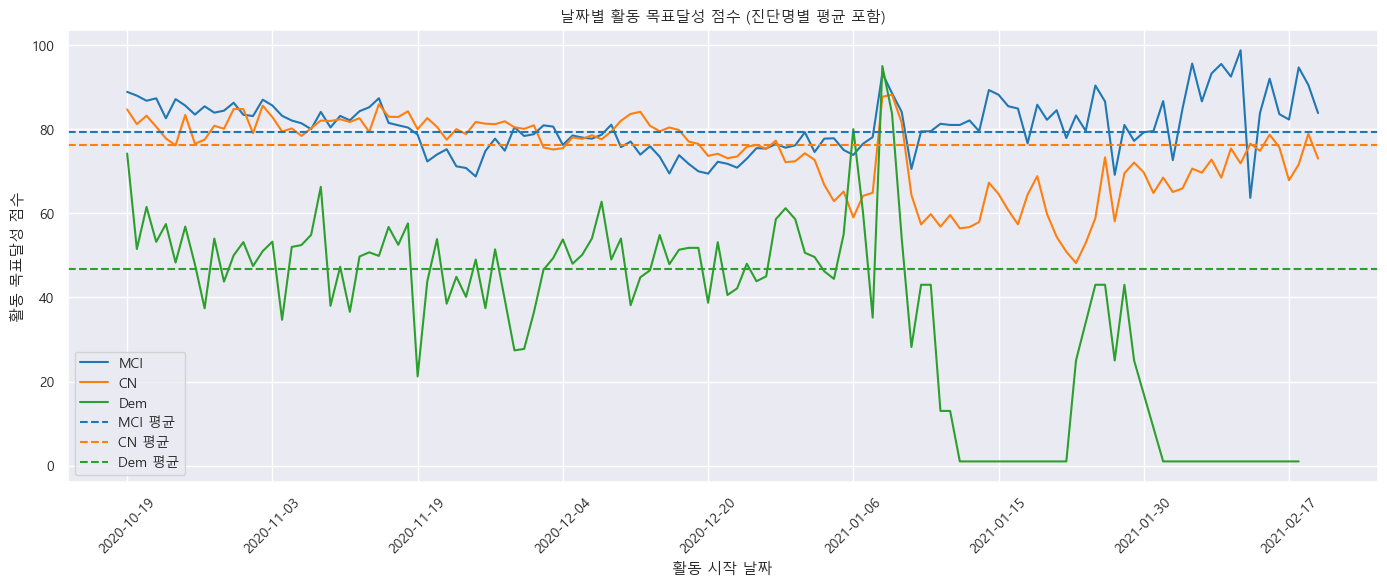

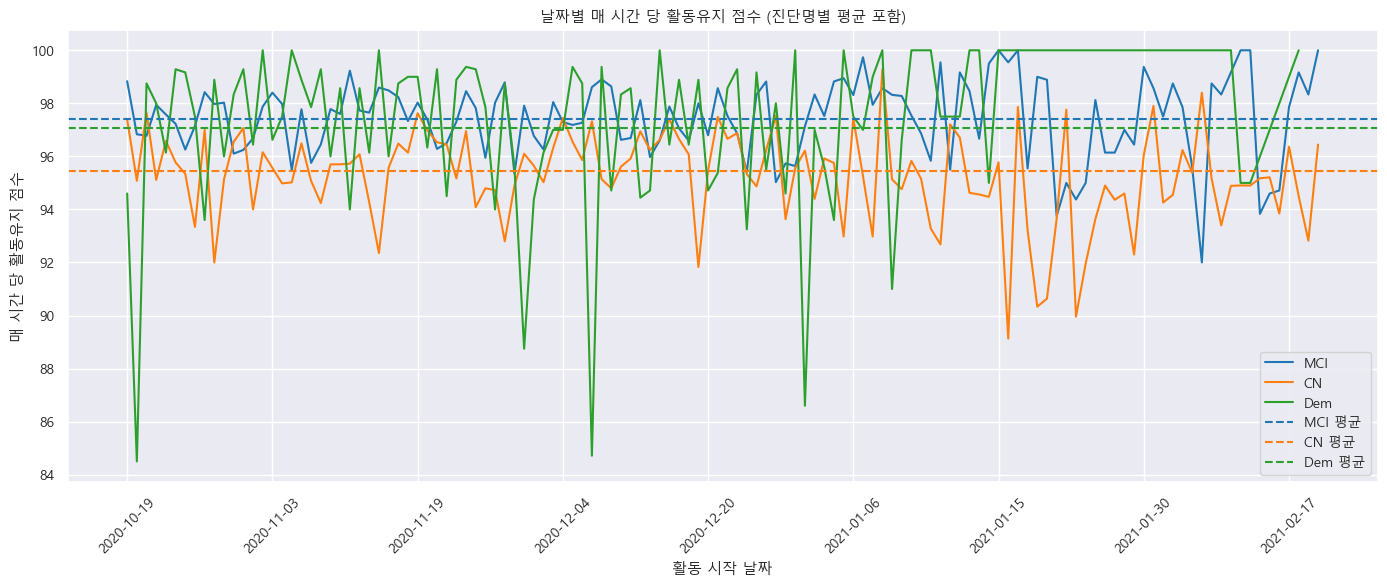

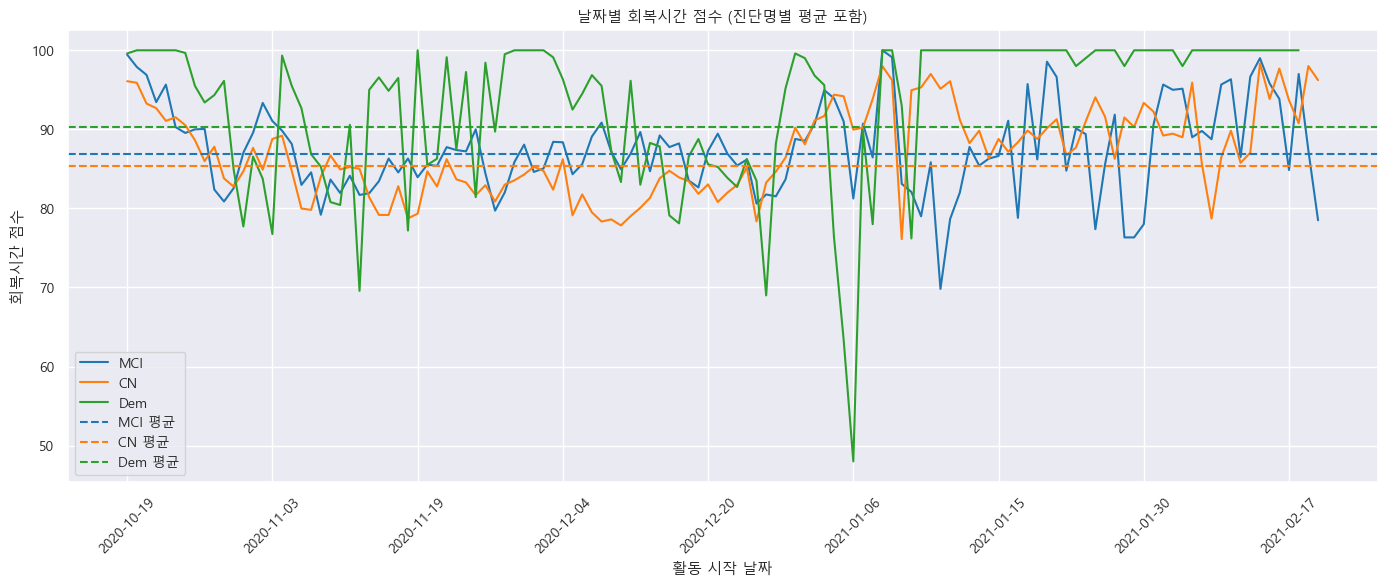

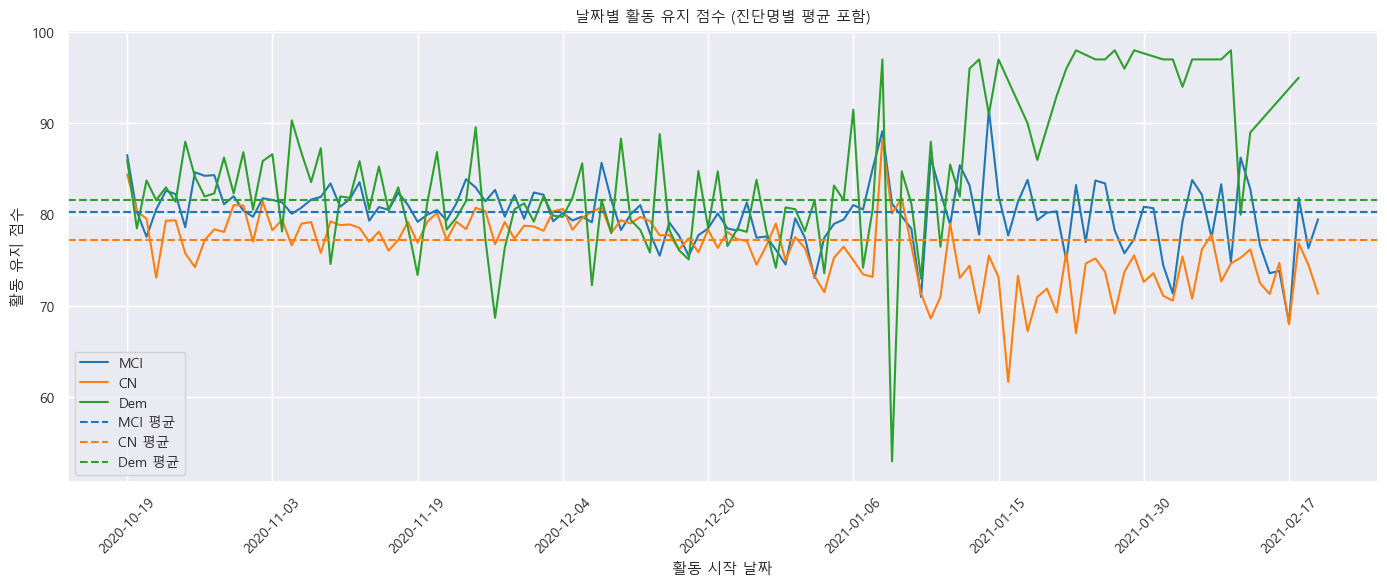

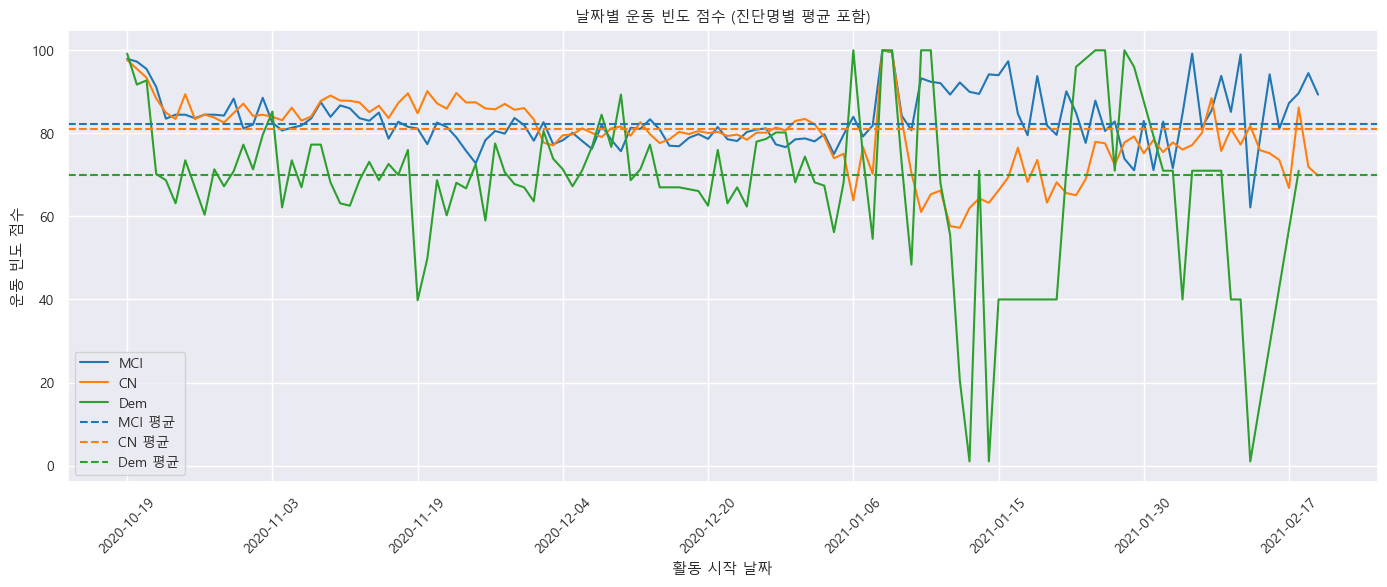

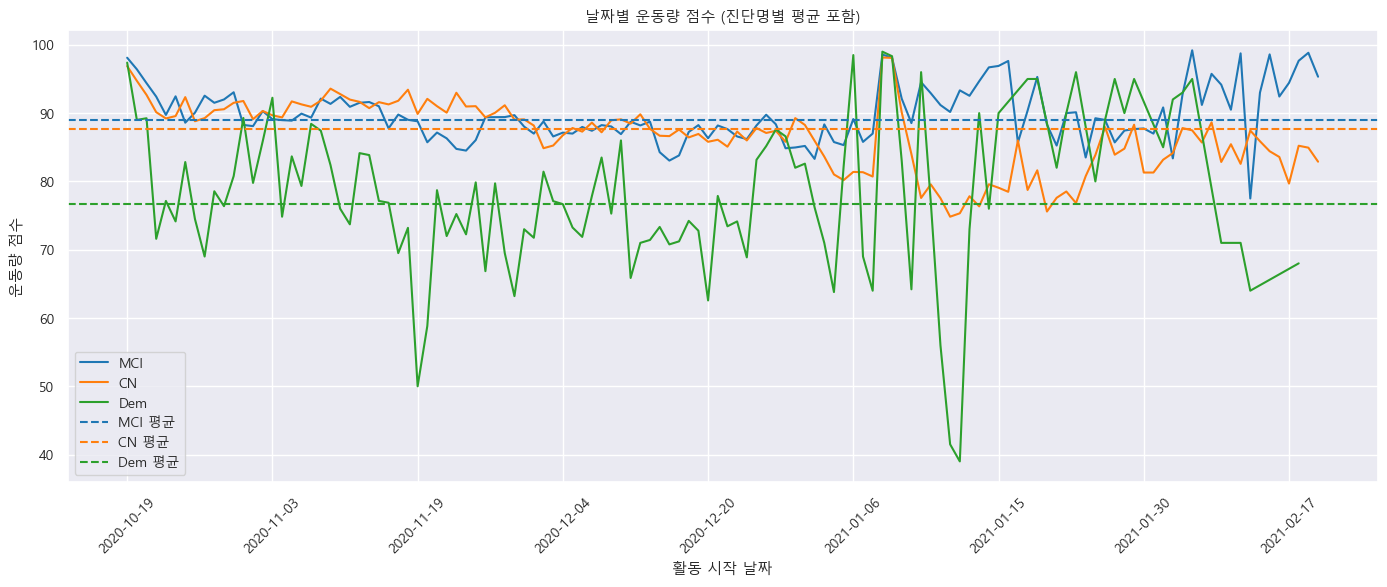

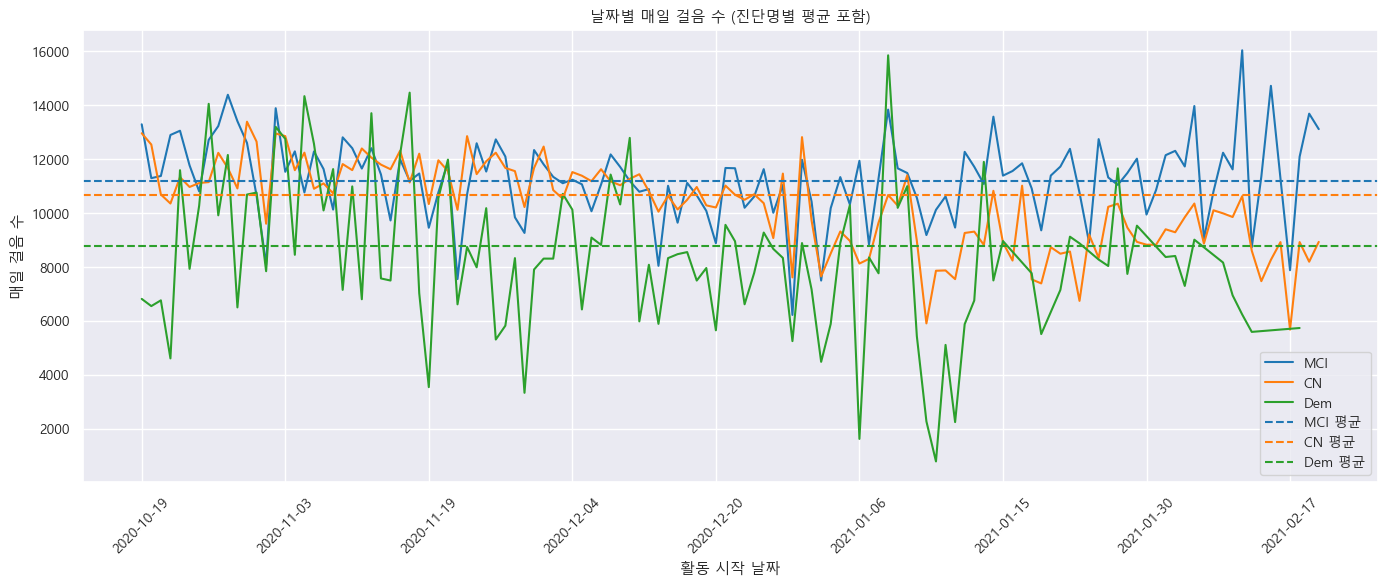

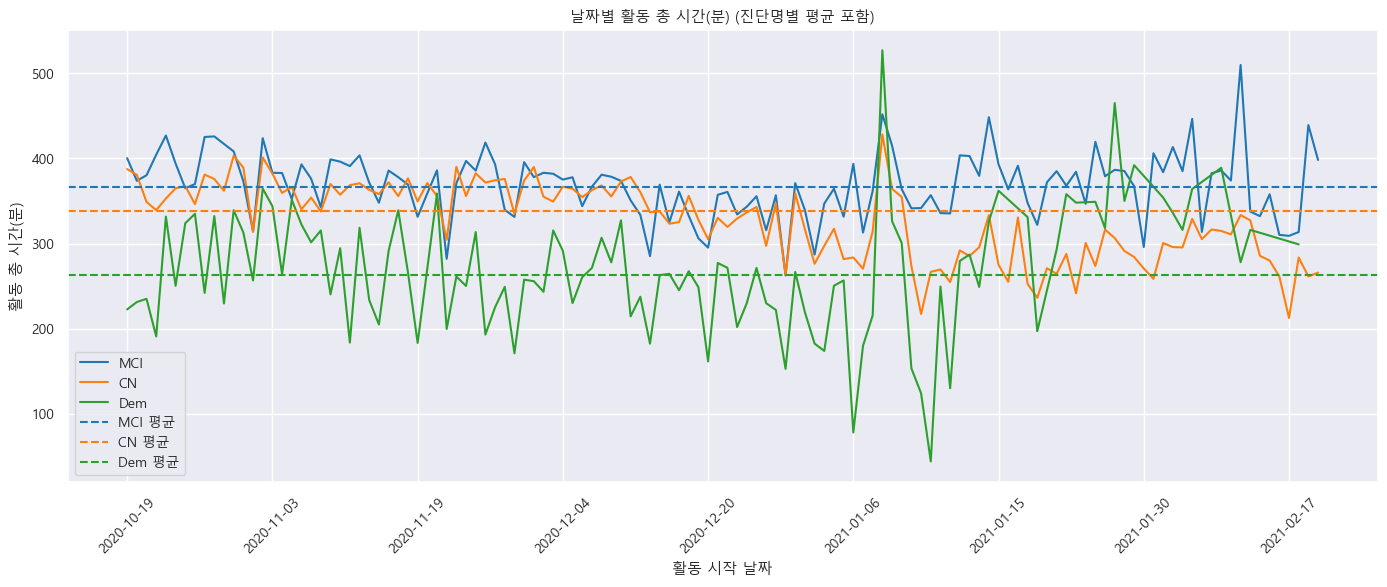

In [10]:
mean_walk_df = walk_df.groupby('진단명').mean(numeric_only=True)
def TimeSeriesWithGroupMean(data, x='활동 시작 날짜', y_cols=None, hue='진단명'):
    if y_cols is None:
        y_cols = [
            '하루간 평균 MET', '하루간 활동 칼로리', '하루간 총 사용 칼로리',
            '매일 움직인 거리(m)', '고강도 활동 시간', '비활동 시간', '비활동 알람 횟수',
            '저강도 활동 시간', '중강도 활동 시간', '하루간 고강도 활동 MET', '하루간 비활동 MET',
            '하루간 저강도 활동 MET', '하루간 중강도 활동 MET', '휴식 시간', '활동 점수',
            '활동 목표달성 점수', '매 시간 당 활동유지 점수', '회복시간 점수', '활동 유지 점수',
            '운동 빈도 점수', '운동량 점수', '매일 걸음 수', '활동 총 시간(분)'
        ]

    palette = sns.color_palette("tab10")  # 색상 미리 고정 (hue 순서 따라감)
    hue_order = data[hue].unique()
    hue_color_dict = dict(zip(hue_order, palette))

    for y in y_cols:
        plt.figure(figsize=(14, 6))
        ax = sns.lineplot(data=data, x=x, y=y, hue=hue, errorbar=None, palette=palette)

        # 그룹별 평균선 추가
        for group in hue_order:
            mean_val = data[data[hue] == group][y].mean()
            ax.axhline(mean_val, linestyle='--', color=hue_color_dict[group], label=f'{group} 평균')

        plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
        plt.xticks(rotation=45)
        plt.title(f'날짜별 {y} (진단명별 평균 포함)')
        plt.grid(True)
        plt.tight_layout()
        plt.legend()
        plt.show()

TimeSeriesWithGroupMean(walk_df)

확실히 Dem을 분류할 수 있는 칼럼은 많이 있는 것 같다.

# 차원 축소 (Dimension Reduction)
## 시각적 판단법
- 그래프 시각화를 통한 변수 제거 시각적 판단법

## 정량적 판단법
- Feature Importance 
- Correlation
- ANOVA
- SHAP

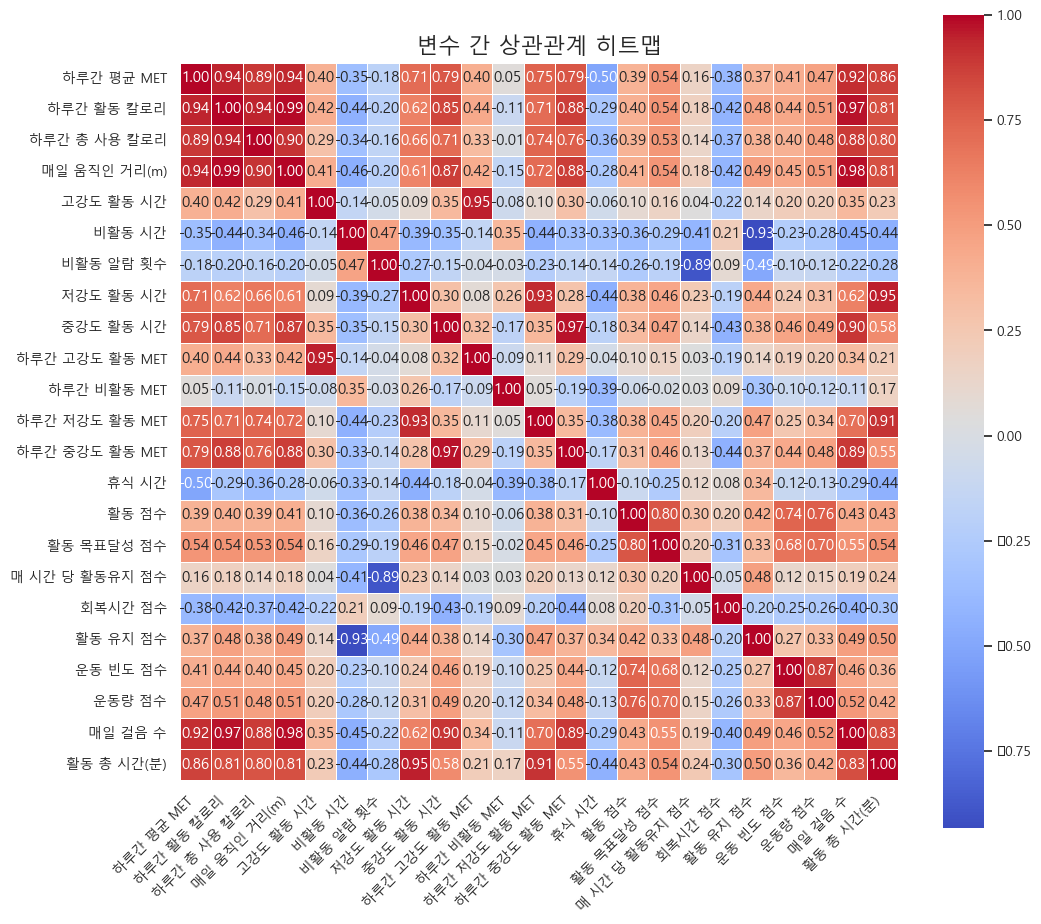

In [5]:
plt.figure(figsize=(11, 11))
sns.set(font_scale=0.9)

plt.rc('font', family='Malgun Gothic')
corr = walk_df.corr(numeric_only=True)

sns.heatmap(corr, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            linewidths=0.5, 
            square=True, 
            cbar_kws={"shrink": 0.8})

plt.title("변수 간 상관관계 히트맵", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Cohen (Statistical Power Analysis for the Behavioral Sciences)
- Small : 0.1
- Medium : 0.3
- Huge : 0.5 

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X는 feature matrix
vif = pd.DataFrame()
vif["Feature"] = walk_df.select_dtypes('number').columns
vif["VIF"] = [variance_inflation_factor(walk_df.select_dtypes('number').values, i) for i in range(walk_df.select_dtypes('number').shape[1])]
vif[vif['VIF'] > 10]
vif

Feature           VIF
0       하루간 평균 MET  9.251112e+02
1       하루간 활동 칼로리  2.606161e+03
2     하루간 총 사용 칼로리  1.375085e+03
3     매일 움직인 거리(m)  7.641524e+03
4        고강도 활동 시간           inf
5           비활동 시간  1.283119e+02
6        비활동 알람 횟수  7.134170e+00
7        저강도 활동 시간           inf
8        중강도 활동 시간           inf
9   하루간 고강도 활동 MET  1.137214e+02
10     하루간 비활동 MET  1.391174e+01
11  하루간 저강도 활동 MET  4.644616e+03
12  하루간 중강도 활동 MET  2.048853e+03
13           휴식 시간  5.289032e+01
14           활동 점수  2.084918e+04
15      활동 목표달성 점수  1.249520e+03
16  매 시간 당 활동유지 점수  8.265973e+02
17         회복시간 점수  1.614787e+03
18        활동 유지 점수  7.027960e+02
19        운동 빈도 점수  2.600079e+02
20          운동량 점수  6.121238e+02
21         매일 걸음 수  2.373346e+02
22      활동 총 시간(분)           inf